In [160]:
from biosignal_and_tetris_result_service import get_player_results

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
pd.set_option('display.max_columns', None)
print(tf.__version__)

%run biosignal_and_tetris_result_service.ipynb

2.2.0


In [182]:
results = get_player_results()

df = results['E03_R02_S01'][0]['p1']

X = df.drop(['Czas','Draw','Lose','Win'],axis=1).values
y = df[['Win', 'Lose', 'Draw']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [177]:
X_train.shape

(11110, 5)

In [178]:
X_test.shape

(4762, 5)

In [179]:
y_train.shape

(11110, 3)

In [181]:
y_test.shape

(4762, 3)

In [184]:
X_train = X_train.reshape(-1, 1, 5)
X_test  = X_test.reshape(-1, 1, 5)
y_train = y_train.reshape(-1, 1, 3)
y_test = y_test.reshape(-1, 1, 3)

In [193]:
model = Sequential()

model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
model.add(LSTM(5, input_shape=(1,5), activation='relu', return_sequences=True))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(5, activation='relu'))

model.add(Dense(3, activation='softmax', name='output'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, y_train, batch_size=512, epochs=400, validation_data=(X_test, y_test))


Epoch 1/400
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
18/22 [=======================>......] - ETA: 0s - loss: 1.0948 - accuracy: 0.5211WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9aa46020e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

22/22 [==============================] - 0s 14ms/step - loss: 0.5902 - accuracy: 0.6888 - val_loss: 0.5906 - val_accuracy: 0.6898
Epoch 46/400
22/22 [==============================] - 0s 12ms/step - loss: 0.5810 - accuracy: 0.6957 - val_loss: 0.5844 - val_accuracy: 0.6966
Epoch 47/400
22/22 [==============================] - 0s 12ms/step - loss: 0.5760 - accuracy: 0.7003 - val_loss: 0.5758 - val_accuracy: 0.7062
Epoch 48/400
22/22 [==============================] - 0s 17ms/step - loss: 0.5711 - accuracy: 0.7058 - val_loss: 0.5724 - val_accuracy: 0.7157
Epoch 49/400
22/22 [==============================] - 0s 15ms/step - loss: 0.5777 - accuracy: 0.7071 - val_loss: 0.5772 - val_accuracy: 0.7010
Epoch 50/400
22/22 [==============================] - 0s 13ms/step - loss: 0.5693 - accuracy: 0.7123 - val_loss: 0.5666 - val_accuracy: 0.7098
Epoch 51/400
22/22 [==============================] - 0s 13ms/step - loss: 0.5641 - accuracy: 0.7129 - val_loss: 0.5633 - val_accuracy: 0.7266
Epoch 52/400

22/22 [==============================] - 0s 15ms/step - loss: 0.5197 - accuracy: 0.7358 - val_loss: 0.5195 - val_accuracy: 0.7383
Epoch 103/400
22/22 [==============================] - 0s 15ms/step - loss: 0.5221 - accuracy: 0.7338 - val_loss: 0.5190 - val_accuracy: 0.7402
Epoch 104/400
22/22 [==============================] - 0s 15ms/step - loss: 0.5207 - accuracy: 0.7339 - val_loss: 0.5134 - val_accuracy: 0.7449
Epoch 105/400
22/22 [==============================] - 0s 19ms/step - loss: 0.5181 - accuracy: 0.7354 - val_loss: 0.5166 - val_accuracy: 0.7398
Epoch 106/400
22/22 [==============================] - 0s 14ms/step - loss: 0.5216 - accuracy: 0.7330 - val_loss: 0.5140 - val_accuracy: 0.7436
Epoch 107/400
22/22 [==============================] - 0s 20ms/step - loss: 0.5162 - accuracy: 0.7363 - val_loss: 0.5120 - val_accuracy: 0.7461
Epoch 108/400
22/22 [==============================] - 0s 15ms/step - loss: 0.5199 - accuracy: 0.7349 - val_loss: 0.5202 - val_accuracy: 0.7394
Epoch 

Epoch 159/400
22/22 [==============================] - 0s 21ms/step - loss: 0.5022 - accuracy: 0.7391 - val_loss: 0.5061 - val_accuracy: 0.7417
Epoch 160/400
22/22 [==============================] - 0s 18ms/step - loss: 0.5022 - accuracy: 0.7376 - val_loss: 0.5039 - val_accuracy: 0.7474
Epoch 161/400
22/22 [==============================] - 1s 24ms/step - loss: 0.5042 - accuracy: 0.7374 - val_loss: 0.4989 - val_accuracy: 0.7461
Epoch 162/400
22/22 [==============================] - 0s 18ms/step - loss: 0.5035 - accuracy: 0.7362 - val_loss: 0.4990 - val_accuracy: 0.7451
Epoch 163/400
22/22 [==============================] - 0s 18ms/step - loss: 0.5011 - accuracy: 0.7381 - val_loss: 0.4985 - val_accuracy: 0.7434
Epoch 164/400
22/22 [==============================] - 0s 18ms/step - loss: 0.5042 - accuracy: 0.7350 - val_loss: 0.4991 - val_accuracy: 0.7432
Epoch 165/400
22/22 [==============================] - 0s 16ms/step - loss: 0.5021 - accuracy: 0.7378 - val_loss: 0.5032 - val_accuracy:

Epoch 216/400
22/22 [==============================] - 0s 17ms/step - loss: 0.4947 - accuracy: 0.7298 - val_loss: 0.4916 - val_accuracy: 0.7404
Epoch 217/400
22/22 [==============================] - 0s 17ms/step - loss: 0.4887 - accuracy: 0.7332 - val_loss: 0.4868 - val_accuracy: 0.7411
Epoch 218/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4883 - accuracy: 0.7363 - val_loss: 0.4846 - val_accuracy: 0.7444
Epoch 219/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4927 - accuracy: 0.7343 - val_loss: 0.4884 - val_accuracy: 0.7419
Epoch 220/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4920 - accuracy: 0.7351 - val_loss: 0.4838 - val_accuracy: 0.7514
Epoch 221/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4883 - accuracy: 0.7379 - val_loss: 0.4863 - val_accuracy: 0.7455
Epoch 222/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4902 - accuracy: 0.7387 - val_loss: 0.4840 - val_accuracy:

Epoch 273/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4826 - accuracy: 0.7470 - val_loss: 0.4807 - val_accuracy: 0.7570
Epoch 274/400
22/22 [==============================] - 0s 13ms/step - loss: 0.4855 - accuracy: 0.7464 - val_loss: 0.4824 - val_accuracy: 0.7593
Epoch 275/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4857 - accuracy: 0.7458 - val_loss: 0.4880 - val_accuracy: 0.7556
Epoch 276/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4911 - accuracy: 0.7425 - val_loss: 0.4812 - val_accuracy: 0.7560
Epoch 277/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4862 - accuracy: 0.7454 - val_loss: 0.4802 - val_accuracy: 0.7583
Epoch 278/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4831 - accuracy: 0.7466 - val_loss: 0.4815 - val_accuracy: 0.7575
Epoch 279/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4873 - accuracy: 0.7449 - val_loss: 0.4846 - val_accuracy:

Epoch 330/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4818 - accuracy: 0.7473 - val_loss: 0.4786 - val_accuracy: 0.7587
Epoch 331/400
22/22 [==============================] - 0s 13ms/step - loss: 0.4792 - accuracy: 0.7494 - val_loss: 0.4750 - val_accuracy: 0.7638
Epoch 332/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4762 - accuracy: 0.7514 - val_loss: 0.4767 - val_accuracy: 0.7589
Epoch 333/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4788 - accuracy: 0.7491 - val_loss: 0.4786 - val_accuracy: 0.7558
Epoch 334/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4773 - accuracy: 0.7512 - val_loss: 0.4732 - val_accuracy: 0.7583
Epoch 335/400
22/22 [==============================] - 0s 12ms/step - loss: 0.4798 - accuracy: 0.7491 - val_loss: 0.4743 - val_accuracy: 0.7640
Epoch 336/400
22/22 [==============================] - 0s 12ms/step - loss: 0.4781 - accuracy: 0.7482 - val_loss: 0.4814 - val_accuracy:

Epoch 387/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4303 - accuracy: 0.7791 - val_loss: 0.4434 - val_accuracy: 0.7726
Epoch 388/400
22/22 [==============================] - 0s 15ms/step - loss: 0.4325 - accuracy: 0.7784 - val_loss: 0.4317 - val_accuracy: 0.7751
Epoch 389/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4264 - accuracy: 0.7809 - val_loss: 0.4313 - val_accuracy: 0.7768
Epoch 390/400
22/22 [==============================] - 0s 16ms/step - loss: 0.4259 - accuracy: 0.7807 - val_loss: 0.4290 - val_accuracy: 0.7757
Epoch 391/400
22/22 [==============================] - 0s 13ms/step - loss: 0.4229 - accuracy: 0.7828 - val_loss: 0.4273 - val_accuracy: 0.7776
Epoch 392/400
22/22 [==============================] - 0s 12ms/step - loss: 0.4246 - accuracy: 0.7815 - val_loss: 0.4321 - val_accuracy: 0.7797
Epoch 393/400
22/22 [==============================] - 0s 14ms/step - loss: 0.4266 - accuracy: 0.7815 - val_loss: 0.4355 - val_accuracy:

In [186]:
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

149/149 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7680
Final test set loss: 0.424554
Final test set accuracy: 0.767955


In [187]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [150]:
losses = pd.DataFrame(history.history)

In [151]:
#losses[['loss','val_loss']].plot()
print(losses.columns.tolist())

['loss', 'accuracy', 'val_loss', 'val_accuracy']


<AxesSubplot:>

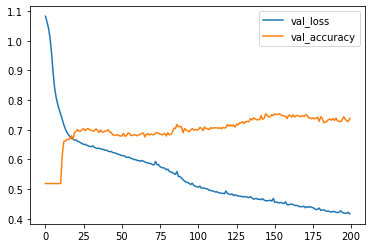

In [188]:
losses[['val_loss','val_accuracy']].plot()

<AxesSubplot:>

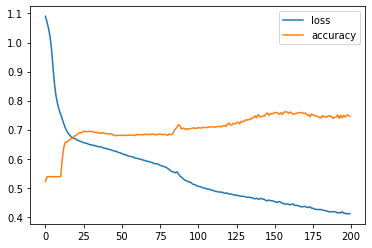

In [153]:
losses[['loss','accuracy']].plot()

<AxesSubplot:>

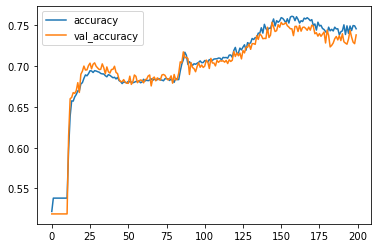

In [190]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

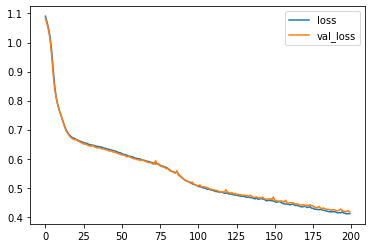

In [189]:
losses[['loss','val_loss']].plot()

In [156]:
y_predicted = model.predict(X_test)
confusion = confusion_matrix(y_test.argmax(axis=1), y_predicted.argmax(axis=1))
print('Confusion Matrix\n')
print(confusion)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Confusion Matrix

[[ 867  210  170]
 [  79 2245  146]
 [ 380  261  404]]


In [157]:
model.save('model_acc_792.h5')  # creates a HDF5 file 'my_model.h5'